In [19]:
import serial
import csv
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D
from datetime import datetime

file_count = input("測定回数を入力してください(例:1): ")  
measurement_kind = input("測定するマッキベンの種類を入力してください(4s or 4l or 6 or s or u): ")
pressure = input("圧力を入力してください(例:4): ")  

測定回数を入力してください(例:1):  1
測定するマッキベンの種類を入力してください(4s or 4l or 6 or s or u):  6
圧力を入力してください(例:4):  3


In [21]:
def read_sensor_and_save_data(file_count, measurement_kind, pressure):
    file_format = "C:\\Users\\Mizuki\\University\\Reserch\\length_sensor\\JupyterLab\\data\\pressure_control\\output\\{date}_{count}_{kind}_{pressure}_p.csv"
    
    current_date = datetime.now().strftime("%Y%m%d")
    pressure_with_decimal = f"0.{pressure}"  
    csv_filename = file_format.format(date=current_date, count=file_count, kind=measurement_kind, pressure=pressure_with_decimal)
    
    try:
        ser = serial.Serial('COM15', 115200, timeout=1)
        
        # 最初のセンサー値取得時の時間を記録
        start_time = time.time()

        with open(csv_filename, mode="w", newline="") as file:
            writer = csv.writer(file)
            writer.writerow(["Time", "Length", "Pressure", "Force"])

            while True:  # 無限ループ
                try:  
                    data = ser.readline().decode().strip()
                    current_time = time.time()
                    elapsed_time = int((current_time - start_time) * 1000)

                    print(f"{elapsed_time} - {data}")

                    if data and not data.startswith("Sensor reading stopped"):
                        parts = data.split(',')
                        if len(parts) == 3:
                            wire_length, pressure_val, force = parts
                            pressure_val = int(pressure_val) / 1000
                            writer.writerow([elapsed_time, wire_length, pressure_val, force])
                        else:
                            print("Invalid data format:", data)
                    elif data.startswith("Sensor reading stopped"):
                        print("Sensor reading stopped. Exiting loop.")
                        break
                except KeyboardInterrupt:
                    print("Interrupt received. Saving CSV file and exiting.")
                    break

    finally:
        ser.close()

read_sensor_and_save_data(file_count, measurement_kind, pressure)


1 - 0,-4,44.60
1 - 0.00,-3,44.60
1 - 0.00,-4,44.60
1 - 0.00,-4,44.60
1 - 0.00,-4,44.60
1 - ,44.60
Invalid data format: ,44.60
2 - 0.00,-4,44.60
2 - 0.00,-4,44.60
2 - 0.00,-4,44.60
2 - 0.00,-4,44.60
3 - 0.00,-3,44.60
3 - 0.00,-4,44.60
3 - 0.00,-4,44.60
3 - 0.00,-4,44.60
16 - 0.00,-3,44.60
37 - 0.00,-4,44.60
53 - 0.00,-4,44.60
74 - 0.00,-4,44.60
93 - 0.00,-4,44.60
115 - 0.00,-4,44.60
135 - 0.00,-4,44.60
155 - 0.00,-3,44.60
176 - 0.00,-4,44.60
196 - 0.00,-4,44.60
213 - 0.00,-4,44.60
232 - 0.00,-4,44.60
253 - 0.00,-6,44.60
274 - 0.00,-4,44.60
294 - 0.00,-4,44.60
315 - 0.00,-4,44.60
335 - 0.00,-4,44.60
352 - 0.00,-4,44.60
372 - 0.00,-4,44.60
392 - 0.00,-4,44.60
413 - 0.00,-4,44.60
434 - 0.00,-6,44.60
454 - 0.00,-4,44.60
474 - 0.00,-4,44.60
495 - 0.00,-4,44.60
515 - 0.00,-4,44.60
532 - 0.00,-4,44.60
552 - 0.00,-4,44.60
572 - 0.00,-4,44.60
594 - 0.00,-4,44.60
614 - 0.00,-4,44.60
635 - 0.00,-3,44.60
655 - 0.00,-4,44.60
671 - 0.00,-4,44.60
691 - 0.00,-4,44.60
712 - 0.00,-4,44.60
733 - 0.00,-4,4

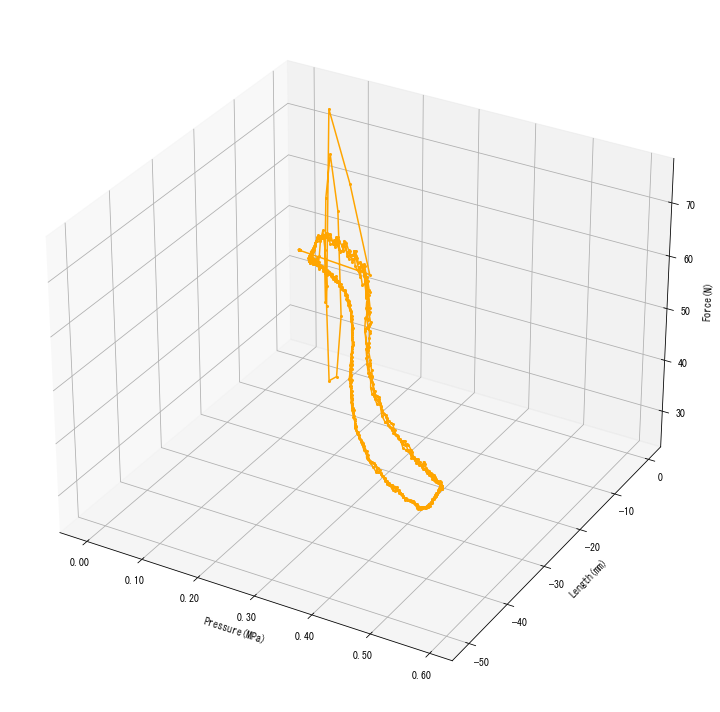

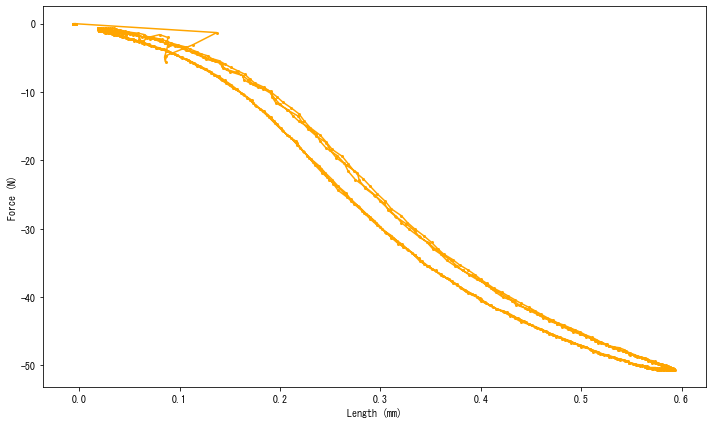

In [22]:
%matplotlib inline
current_date = datetime.now().strftime("%Y%m%d") 
pressure = f"0.{pressure}"  

plt.rcParams['font.family'] = 'MS Gothic'

# データの読み込み
dt = pd.read_csv(f"C:\\Users\\Mizuki\\University\\Reserch\\length_sensor\\JupyterLab\\data\\pressure_control\\output\\{current_date}_{file_count}_{measurement_kind}_{pressure}_p.csv")

# 列の選択
column = dt[["Pressure", "Length", "Force"]]


# グラフの作成
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# すべてのデータをオレンジでプロット
ax.plot(column["Pressure"], column["Length"], column["Force"], c='orange', marker='o', markersize=2)

# 軸ラベルの設定
ax.set_xlabel('Pressure(MPa)')
ax.set_ylabel('Length(mm)')
ax.set_zlabel('Force(N)')

# x軸のメモリフォーマットと設定
ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))  # 少数第二位まで表示

# グラフの保存
save_path = f'C:\\Users\\Mizuki\\University\\Reserch\\length_sensor\\JupyterLab\\graph\\pressure_control\\output\\{current_date}_{file_count}_{measurement_kind}_{pressure}_p-1.jpg'
plt.savefig(save_path, bbox_inches='tight')

plt.tight_layout()
plt.show()


# 以下2D

# 列の選択（Pressure列を削除）
column = dt[["Length", "Pressure"]]


# 二次元プロット
fig, ax = plt.subplots(figsize=(10, 6))

# すべてのデータをオレンジでプロット
ax.plot(column["Pressure"], column["Length"], c='orange', marker='o', markersize=2)

# 軸ラベルの設定
ax.set_xlabel('Length (mm)')
ax.set_ylabel('Force (N)')

# 軸のメモリのフォーマットおよび設定
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

# 凡例の表示
#ax.legend(loc='upper left', fontsize='xx-large')

# 保存パスとファイル名を指定してグラフを画像として保存（JPG形式）
save_path = f'C:\\Users\\Mizuki\\University\\Reserch\\length_sensor\\JupyterLab\\data\\pressure_control\\{current_date}_{file_count}_{measurement_kind}_{pressure}_p-2.jpg'
plt.savefig(save_path, bbox_inches='tight')


# グラフの表示
plt.tight_layout()
plt.show()
